In [37]:
import tensorflow as tf;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [38]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout;
from tensorflow.keras.models import Model; 

In [39]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data();
X_train,X_test=X_train/255.0,X_test/255.0;
X_train=np.expand_dims(X_train,-1);
X_test =np.expand_dims(X_test ,-1);
K=len(set(y_train));
print("Number of Classes : {}".format(K));

Number of Classes : 10


In [40]:
i=Input(shape=X_train[0].shape);
x=Conv2D(32,(3,3),strides=2,padding='same',activation='relu')(i);
x=Conv2D(64,(3,3),strides=2,padding='same',activation='relu')(x);
x=Conv2D(128,(3,3),strides=2,padding='same',activation='relu')(x);
x=Flatten()(x);
x=Dense(512,activation='relu')(x);
x=Dropout(0.2)(x);
x=Dense(K,activation='softmax')(x);
model=Model(i,x);
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
log=model.fit(X_train,y_train,batch_size=100,epochs=10,verbose=1,validation_data=(X_test,y_test));

Epoch 1/10
600/600 [==============================] - 2s 4ms/step - loss: 0.2031 - accuracy: 0.9378 - val_loss: 0.0537 - val_accuracy: 0.9819
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 0.0431 - val_accuracy: 0.9859
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0353 - val_accuracy: 0.9884
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0408 - val_accuracy: 0.9875
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0385 - val_accuracy: 0.9877
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0391 - val_accuracy: 0.9886
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0343 - val_accuracy: 0.9899
Epoch 

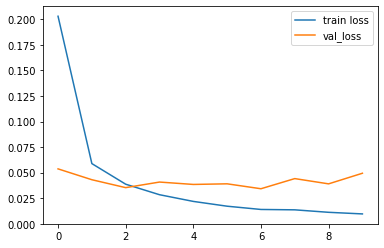

In [41]:
plt.plot(log.history['loss'],label='train loss');
plt.plot(log.history['val_loss'],label='val_loss');
plt.legend()

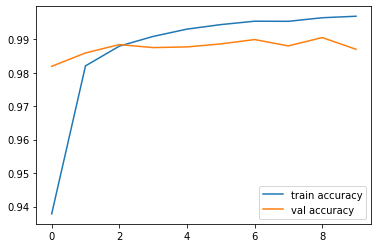

In [42]:
plt.plot(log.history['accuracy'],label='train accuracy');
plt.plot(log.history['val_accuracy'],label='val accuracy');
plt.legend()

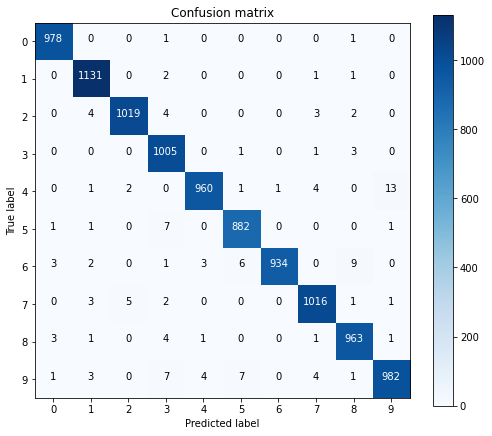

In [43]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,num_classes):
  plt.figure(figsize=(7,6))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix");
  plt.colorbar()
  plt.xticks(np.arange(num_classes));
  plt.yticks(np.arange(num_classes));
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], 'd'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black");
  plt.tight_layout();
  plt.ylabel('True label');
  plt.xlabel('Predicted label');
  plt.show()
y_pred=model.predict(X_test).argmax(axis=1);
plot_confusion_matrix(confusion_matrix(y_test,y_pred),K);

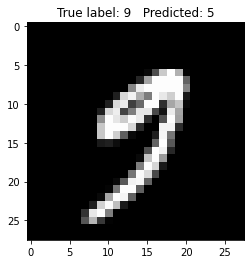

In [45]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: {}   Predicted: {}".format(y_test[i],y_pred[i]));